In [1]:
import os
import urllib.request

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from rasterio.warp import transform
import pandas as pd
import xarray as xr

In [15]:
da = xr.open_rasterio("../../../data_general/proc_sif-optim/smap_ssma_2018.tif")
ref = xr.open_rasterio('../../../data_general/proc_sif-optim/sif_refgrid.tif')
da

<xarray.DataArray (band: 122, y: 277, x: 644)>
[21763336 values with dtype=float32]
Coordinates:
  * band     (band) int64 1 2 3 4 5 6 7 8 9 ... 115 116 117 118 119 120 121 122
  * y        (y) float64 49.36 49.27 49.18 49.09 ... 24.84 24.75 24.66 24.57
  * x        (x) float64 -124.7 -124.6 -124.6 -124.5 ... -67.15 -67.06 -66.97
Attributes:
    transform:      (0.08983152841195215, 0.0, -124.77599296420154, 0.0, -0.0...
    crs:            +init=epsg:4326
    res:            (0.08983152841195215, 0.08983152841195215)
    is_tiled:       1
    nodatavals:     (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n...
    scales:         (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1...
    offsets:        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
    descriptions:   ('NASA_USDA_SMAP_SM20180101_20180103_ssma', 'NASA_USDA_SM...
    AREA_OR_POINT:  Area

In [27]:
da = da.rename("ssma")


AttributeError: 'DataArray' object has no attribute 'toInt'

In [16]:
da = da.rename({'band':'time'})

In [19]:
da['time'] = pd.date_range("2018-01-01",periods=122)

In [20]:
new_lon = ref['x']
new_lat = ref['y']
new_time = pd.date_range("2018-01-01", periods=364)

In [31]:
da = da.astype('float16')

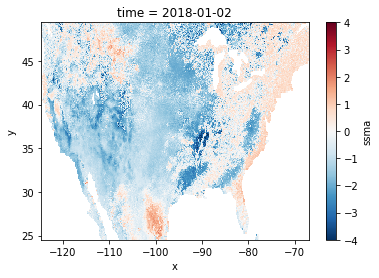

In [36]:
da[1,:,:].plot()

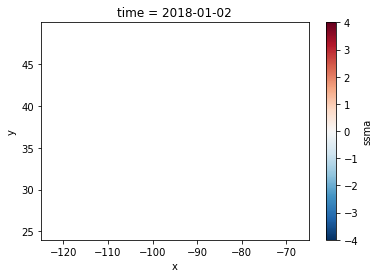

In [37]:
da[1,:,:].interp(x=new_lon,y=new_lat).plot()

In [32]:
da2 = da.interp(x=new_lon,y=new_lat,time=new_time)

MemoryError: Unable to allocate 209. GiB for an array with shape (13334, 5778, 364) and data type timedelta64[ns]